# Can We Improve Our Model Above 99%?

## Data Augmentation

In [19]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import seaborn as sns

from scipy.ndimage import shift
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,confusion_matrix
import time

In [20]:
from sklearn.datasets import fetch_openml

In [21]:
# Import the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)

/Users/gloriahwoang/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
# Show the keys in the dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [23]:
# We want to grab the data and the target as X and y, respectively.
X,y = mnist["data"], mnist["target"]

In [24]:
# The MNIST dataset is already split into a training set and test set (first 60,000 images and last 10,000, respectively).
# The training set is already shuffled for us, which guarantees that all cross-validation folds will be similar (we don't want one fold to be missing some digits)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

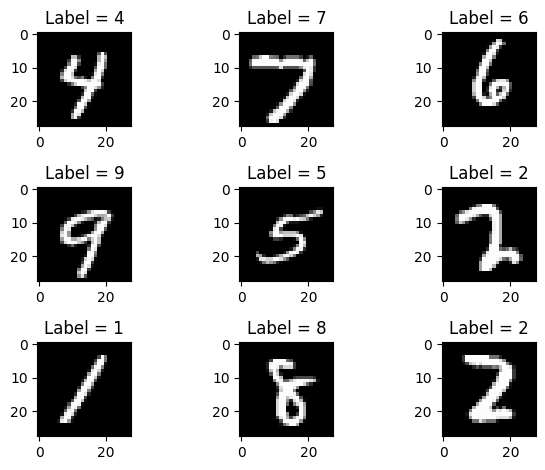

In [25]:
# Let's visualize some of these numbers
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train.loc[num].array.reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Label = {}".format(y_train[num]))
    
plt.tight_layout()

In [26]:
trainX_aug = []

for i in range(len(X_train)):
        image = X_train.loc[i].array
        image = image.reshape(28, 28)
        shifted_image = shift(image, [1, 0], cval=0, mode="constant")
        shifted_image = shifted_image.reshape([-1])
        trainX_aug.append(shifted_image.round())

for i in range(len(X_train)):
        image = X_train.loc[i].array
        image = image.reshape(28, 28)
        shifted_image = shift(image, [-1,0], cval=0, mode="constant")
        shifted_image = shifted_image.reshape([-1])
        trainX_aug.append(shifted_image.round())

# for i in range(len(X_train)):
#         image = X_train.loc[i].array
#         image = image.reshape(28, 28)
#         shifted_image = shift(image, [0,1], cval=0, mode="constant")
#         shifted_image = shifted_image.reshape([-1])
#         trainX_aug.append(shifted_image.round())

# for i in range(len(X_train)):
#         image = X_train.loc[i].array
#         image = image.reshape(28, 28)
#         shifted_image = shift(image, [0,-1], cval=0, mode="constant")
#         shifted_image = shifted_image.reshape([-1])
#         trainX_aug.append(shifted_image.round())
        

In [27]:
len(trainX_aug)

120000

In [28]:
X_train.columns = range (X_train.shape[1])
X_train.T.reset_index(drop=True).T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
trainX_aug = pd.DataFrame(trainX_aug).append(X_train)

/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_60283/1743320331.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainX_aug = pd.DataFrame(trainX_aug).append(X_train)


In [30]:
trainY_aug=y_train.append(y_train).append(y_train).append(y_train).append(y_train)

/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_60283/3171660259.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainY_aug=y_train.append(y_train).append(y_train).append(y_train).append(y_train)
/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_60283/3171660259.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainY_aug=y_train.append(y_train).append(y_train).append(y_train).append(y_train)
/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_60283/3171660259.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainY_aug=y_train.append(y_train).append(y_train).append(y_train).append(y_train)


In [31]:
trainY_aug

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 300000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [32]:
trainX_aug

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
shuffle_idx = np.random.permutation(len(trainX_aug))
trainX_aug = np.array(trainX_aug)[shuffle_idx]
trainY_aug = np.array(trainY_aug)[shuffle_idx]

In [34]:
X_test.columns = range (X_test.shape[1])
X_test.T.reset_index(drop=True).T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Check Accuracy on Test Data with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainX_aug, trainY_aug)
y_test_hat=knn.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with Data Augmentation is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with Data Augmentation is : 97.32%


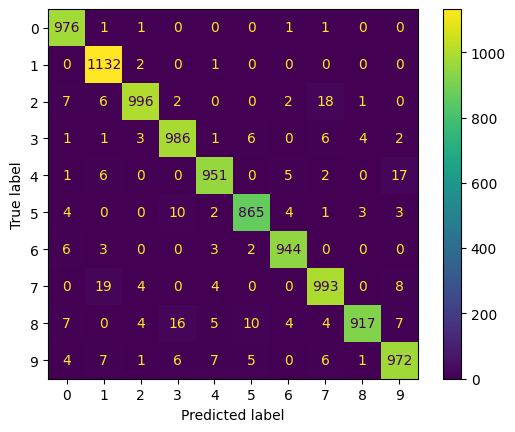

In [36]:
cm = confusion_matrix(y_test, y_test_hat, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()